Piyush Singla Kaggle link -> https://www.kaggle.com/mpiyu20/account
Nikhil Singla Kaggle link -> https://www.kaggle.com/nikhilsharma4

## Housing price prediction using ANN

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [3]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Processing missing values

In [8]:
df_train.isnull().sum().sort_values(ascending =False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

Percentage of missing data

In [9]:
df_train.isnull().sum().sort_values(ascending =False).head(20)/len(df_train)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

Removing the parameters with missing data 

In [10]:
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1,inplace=True)
df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage',],axis=1,inplace=True)

Treatment of left parameters having missing values

In [11]:
import random
missing_values = df_train.columns[df_train.isna().any()].to_list()
for each in missing_values:
    if (df_train[each].dtypes =='float64'):
        minimum= int(df_train[each].quantile(0.25))
        maximum= int(df_train[each].quantile(0.75))
        A=df_train[df_train[each].isnull()].index.tolist()
        for i in A:
            df_train.loc[i,each]=random.randint(minimum,maximum)
        df_train[each]=pd.to_numeric(df_train[each])
   

    elif(df_train[each].dtypes == 'object'):
        if ('True' in str(df_train[each].str.contains('No').unique().tolist())):
            df_train[each].fillna('No',inplace=True)
        elif('True' in str(df_train[each].str.contains('None').unique().tolist())):
            df_train[each].fillna('None',inplace=True)
        elif('True' in str(df_train[each].str.contains('Unf').unique().tolist())):
            df_train[each].fillna('Unf',inplace=True)
        else:
            A=df_train[df_train[each].isnull()].index.tolist()
            unique = df_train[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                df_train.loc[i,each]=random.choice(unique)


missing_values = df_test.columns[df_test.isna().any()].to_list()
for each in missing_values:
    if (df_test[each].dtypes =='float64'):
        minimum= int(df_test[each].quantile(0.25))
        maximum= int(df_test[each].quantile(0.75))
        A=df_test[df_test[each].isnull()].index.tolist()
        for i in A:
            df_test.loc[i,each]=random.randint(minimum,maximum)
        df_test[each]=pd.to_numeric(df_test[each])
   

    elif(df_test[each].dtypes == 'object'):
        if ('True' in str(df_test[each].str.contains('No').unique().tolist())):
            df_test[each].fillna('No',inplace=True)
        elif('True' in str(df_test[each].str.contains('None').unique().tolist())):
            df_test[each].fillna('None',inplace=True)
        elif('True' in str(df_test[each].str.contains('Unf').unique().tolist())):
            df_test[each].fillna('Unf',inplace=True)
        else:
            A=df_test[df_test[each].isnull()].index.tolist()
            unique = df_test[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                df_test.loc[i,each]=random.choice(unique)


Removing the Id column

In [12]:
df_train.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

Now checking the correlation between continuous parameters and plotting the heatmap

# Exploratory data analysis

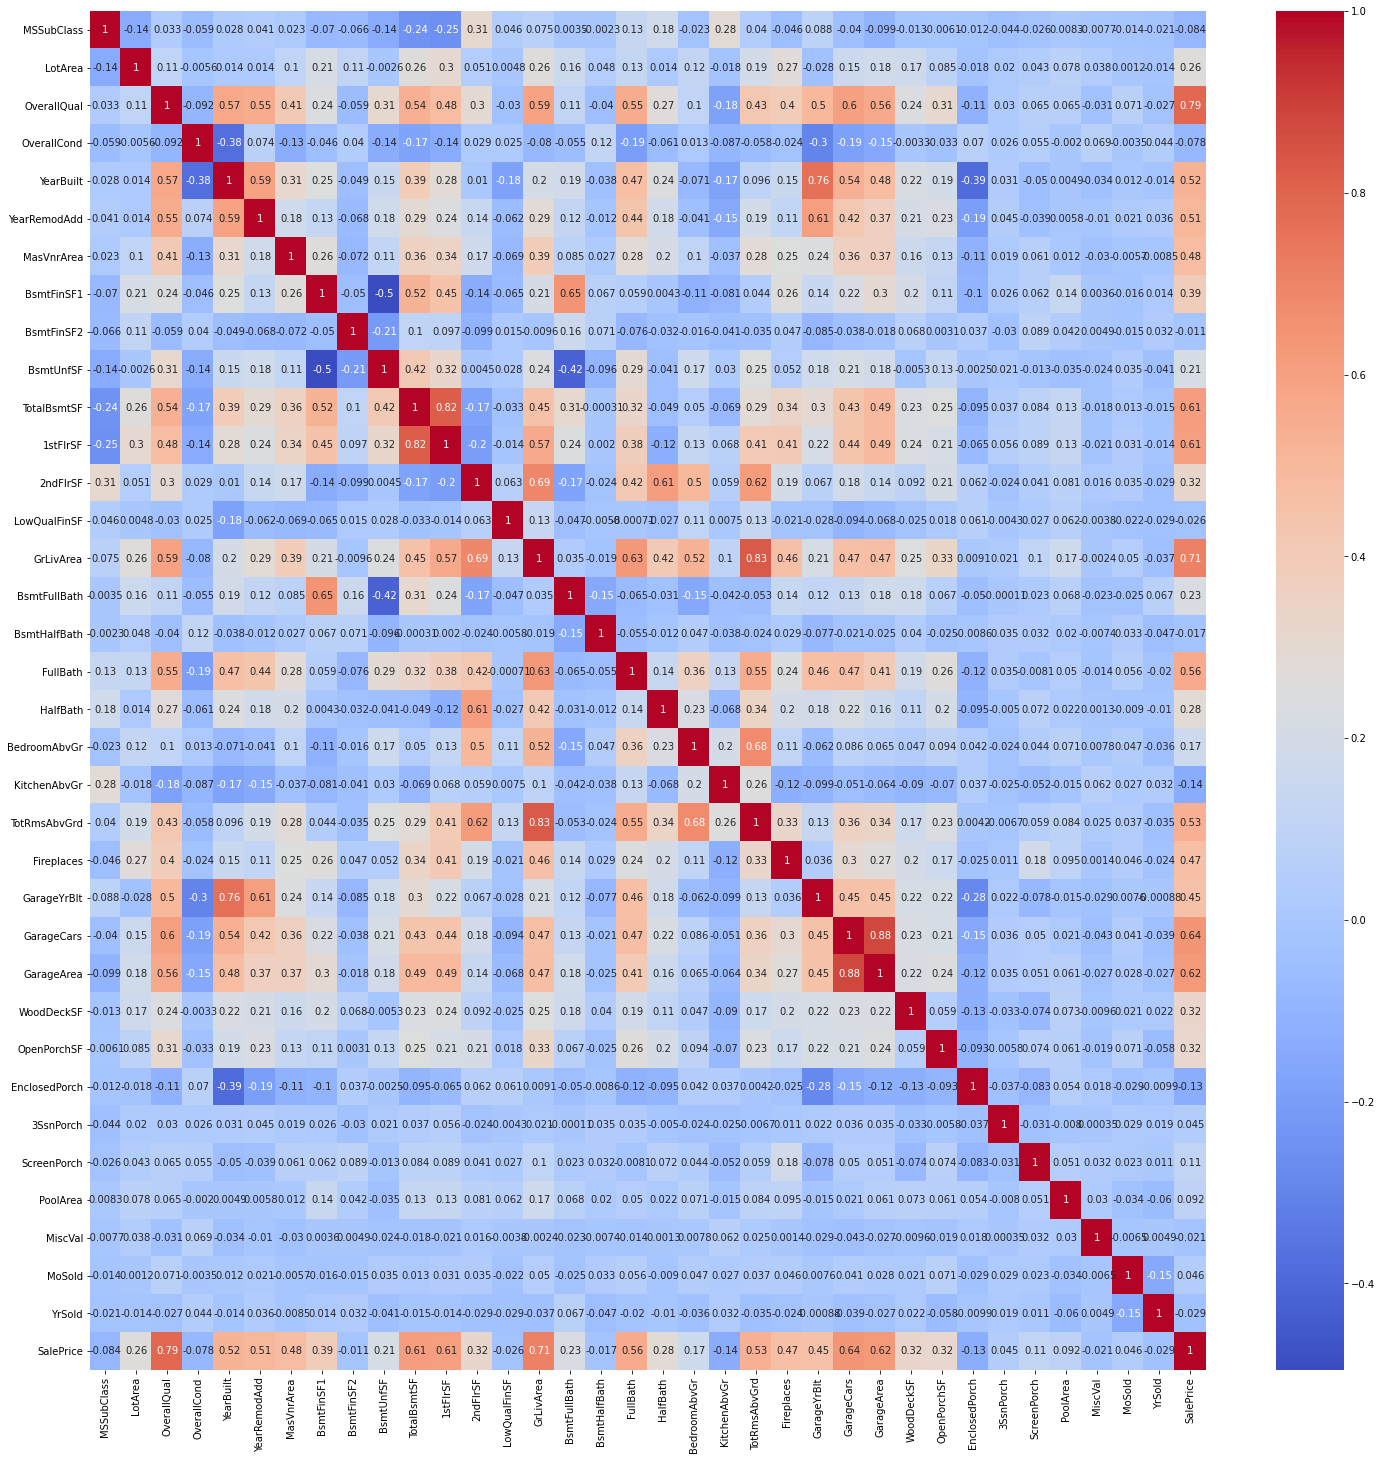

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

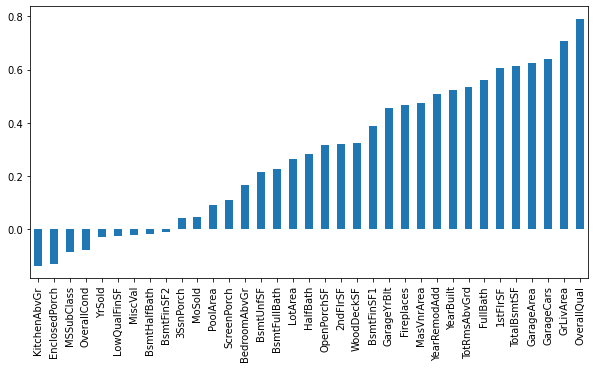

In [14]:
plt.figure(figsize=(10,5))
df_train.corr()['SalePrice'].sort_values().drop('SalePrice').plot(kind='bar')

For continous parameters, the most correlated values to Sale Price are given in the above plot

Now, analysing some most correlated parameters using Seaborn 

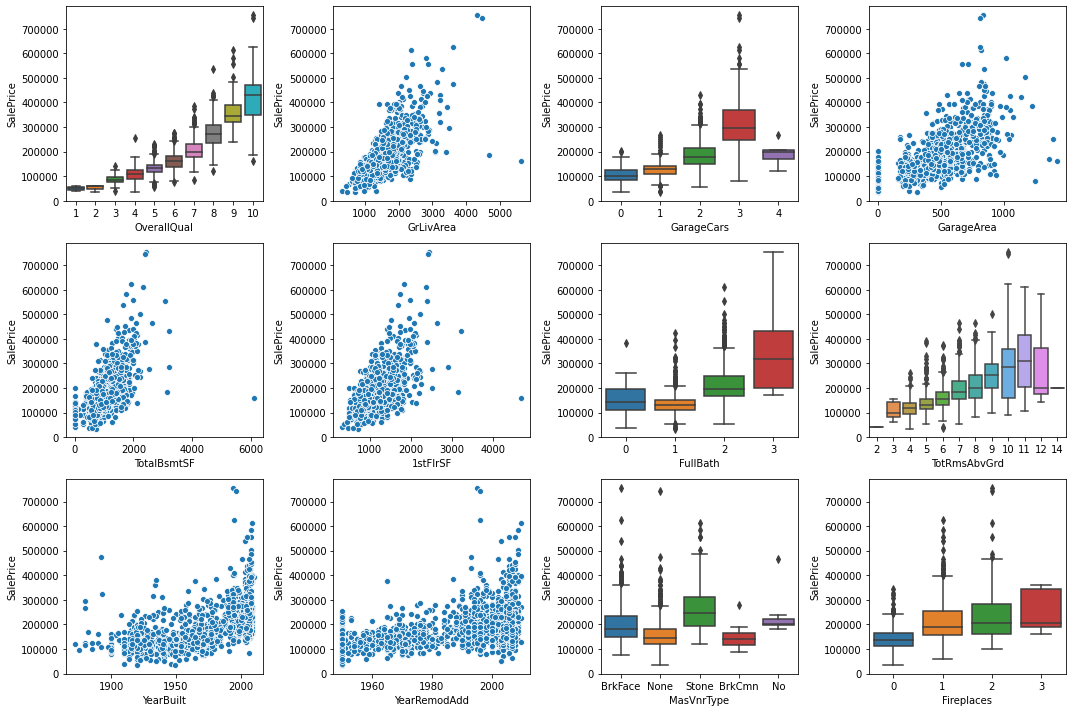

In [15]:
fig = plt.figure(figsize=(15,10));   
ax1 = fig.add_subplot(3,4,1);  
ax2 = fig.add_subplot(3,4,2);
ax3 = fig.add_subplot(3,4,3);  
ax4 = fig.add_subplot(3,4,4);
ax5 = fig.add_subplot(3,4,5);  
ax6 = fig.add_subplot(3,4,6);
ax7 = fig.add_subplot(3,4,7);  
ax8 = fig.add_subplot(3,4,8);
ax9 = fig.add_subplot(3,4,9);  
ax10 = fig.add_subplot(3,4,10);
ax11 = fig.add_subplot(3,4,11);  
ax12 = fig.add_subplot(3,4,12);

sns.boxplot("OverallQual", "SalePrice", data=df_train,ax=ax1)
sns.scatterplot("GrLivArea", "SalePrice", data=df_train, ax=ax2)
sns.boxplot("GarageCars", "SalePrice", data=df_train,ax=ax3)
sns.scatterplot("GarageArea", "SalePrice", data=df_train, ax=ax4)
sns.scatterplot("TotalBsmtSF", "SalePrice", data=df_train,ax=ax5)
sns.scatterplot("1stFlrSF", "SalePrice", data=df_train, ax=ax6)
sns.boxplot("FullBath", "SalePrice", data=df_train,ax=ax7)
sns.boxplot("TotRmsAbvGrd", "SalePrice", data=df_train, ax=ax8)
sns.scatterplot("YearBuilt", "SalePrice", data=df_train,ax=ax9)
sns.scatterplot("YearRemodAdd", "SalePrice", data=df_train, ax=ax10)
sns.boxplot("MasVnrType", "SalePrice", data=df_train,ax=ax11)
sns.boxplot("Fireplaces", "SalePrice", data=df_train, ax=ax12)
plt.tight_layout()

#### Analysis from the above plot
Overall Quality
- SalePrice follows a linear relation with Overall quality of the house(as obvious)
- When OverallQual = 10, the range of SalePrice is between 350,000 to 500,000

Garage Cars
- Evidenty, if the house has size of garage for accomodating 3 cars, the selling price will be more  
- There are only 5 houses having 4 car space garage, so we can't say much about it, but the prices are lower than 3 car space houses

FullBath, Total Rooms above ground and Fireplaces
- More number of these parameter in the house, more is the selling price of the house
- When the parameter starts to increase the variation in SalePrice also increases because it starts depending on other paramters more to make an accurate prediction.  

MasVnrType
- Masonry veneer Stone type has more selling price followed by brick face and common brick

Scatter Plots
- all the scatterplots including GRLivArea, GarageArea, 1stFlrSF and TotalBsmtSF follows a linear trend with Sale Price



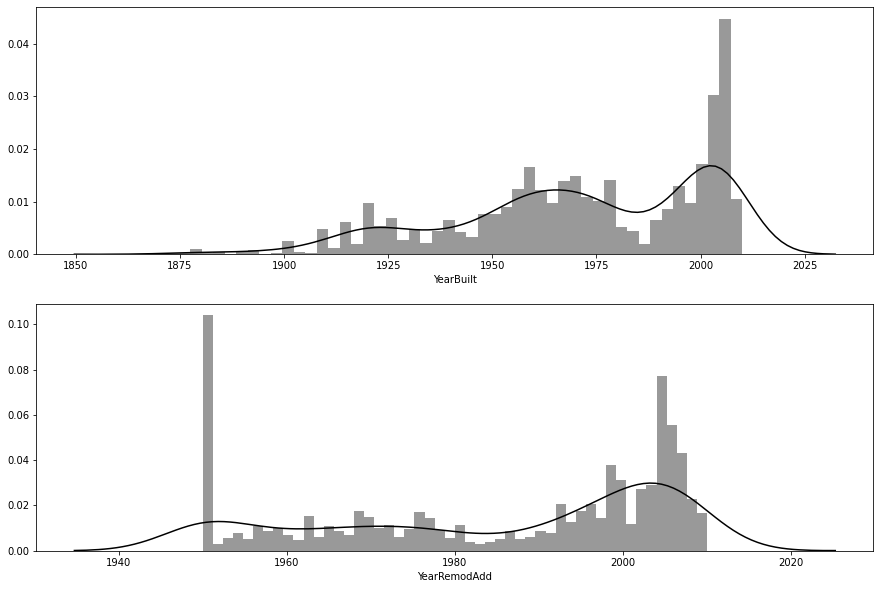

In [16]:
fig = plt.figure(figsize=(15,10));   
ax1 = fig.add_subplot(2,1,1);  
ax2 = fig.add_subplot(2,1,2);
sns.distplot(df_train['YearBuilt'],bins=50,color='black',ax=ax1)
sns.distplot(df_train['YearRemodAdd'],bins=50,color='black',ax=ax2)

Most of the houses were build in the 2000's and big chunk in 1950's and 1960's. Most of the houses were remodelled/rebuilt in 1950

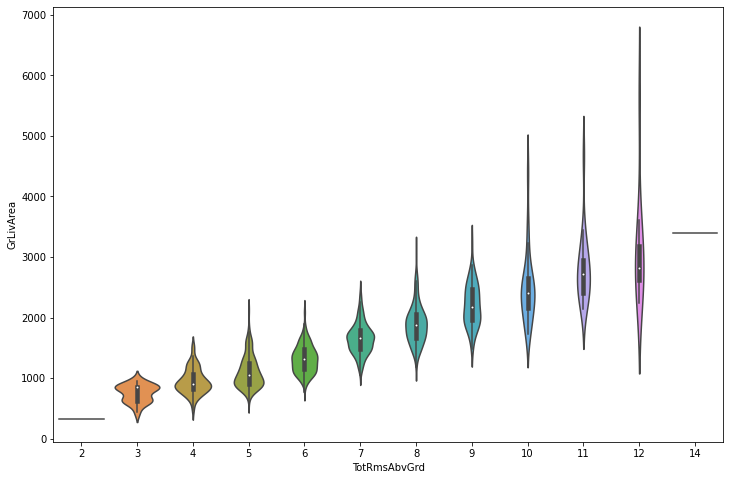

In [17]:
plt.figure(figsize=(12,8))
sns.violinplot(x='TotRmsAbvGrd',y='GrLivArea',data=df_train)

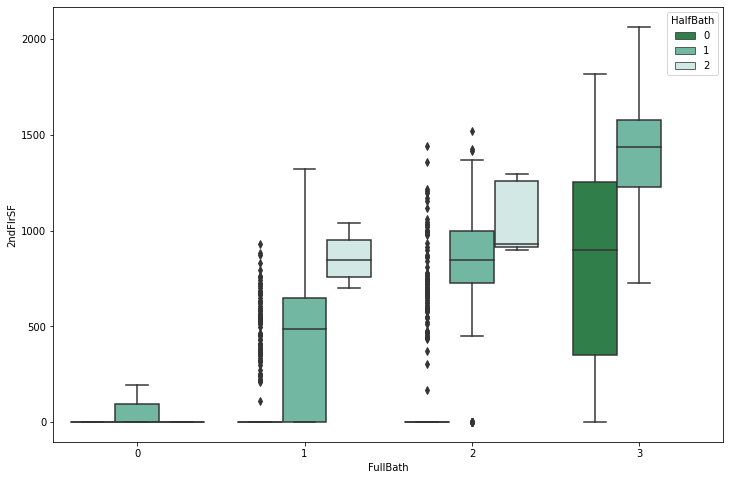

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='FullBath',y='2ndFlrSF',data=df_train,hue='HalfBath',palette="BuGn_r")

Number of half baths in a house is independent of full baths. As, mostly in all houses the number of half baths is 1

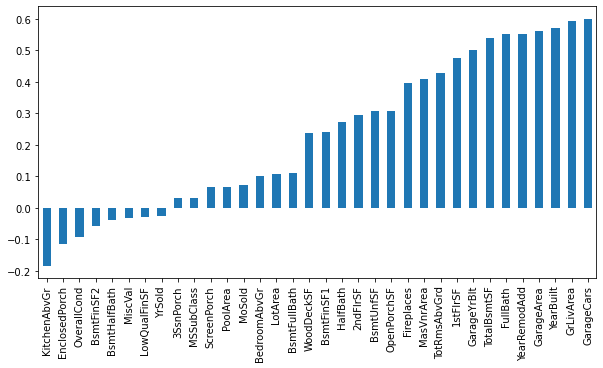

In [19]:
plt.figure(figsize=(10,5))
df_train.corr()['OverallQual'].sort_values().drop(['OverallQual','SalePrice']).plot(kind='bar')

Above plot define the parameters on which the overall quality of the house depends, that are Garage living area, Garage cars, year it was built and No. of full baths

#### Analysis on catagorical features with dtype object

In [20]:
catogorical_features_ = np.array([df_train.columns[df_train.dtypes == 'object'].to_list()])
catogorical_features_

array([['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']],
      dtype='<U13')

In [21]:
df_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [22]:
# All the records in utilities are mostly AllPub 
df_train.drop('Utilities',axis=1,inplace=True)
df_test.drop('Utilities',axis=1,inplace=True)

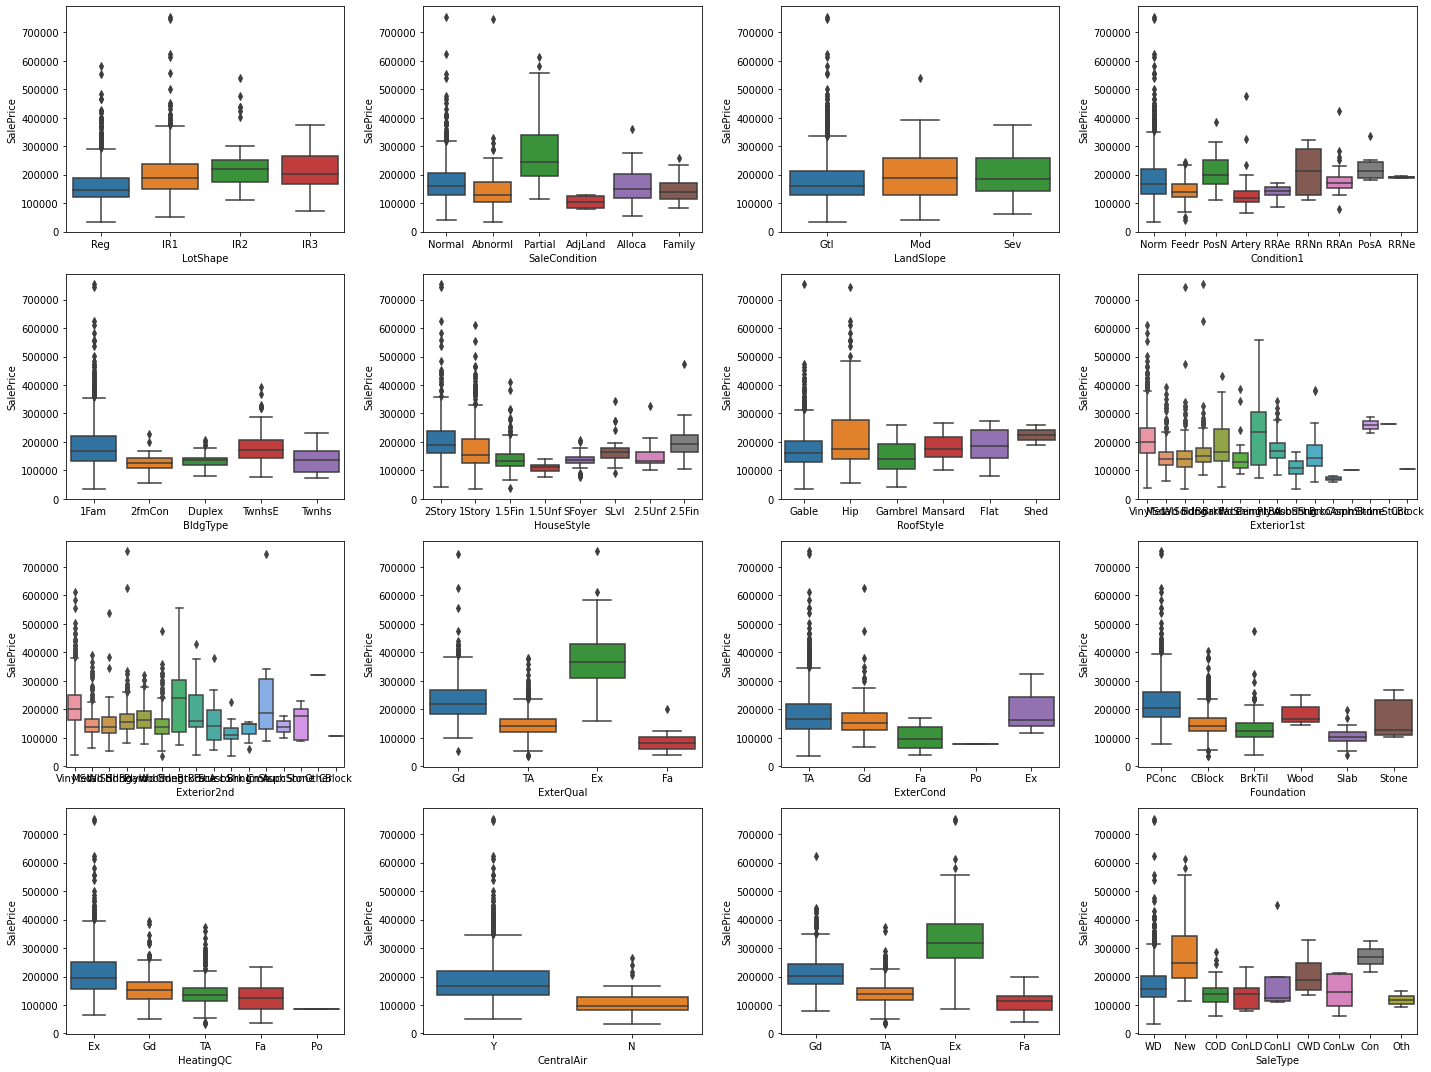

In [23]:
fig = plt.figure(figsize=(20,15));   
ax1 = fig.add_subplot(4,4,1);  
ax2 = fig.add_subplot(4,4,2);
ax3 = fig.add_subplot(4,4,3);  
ax4 = fig.add_subplot(4,4,4);
ax5 = fig.add_subplot(4,4,5);  
ax6 = fig.add_subplot(4,4,6);
ax7 = fig.add_subplot(4,4,7);  
ax8 = fig.add_subplot(4,4,8);
ax9 = fig.add_subplot(4,4,9);  
ax10 = fig.add_subplot(4,4,10);
ax11 = fig.add_subplot(4,4,11);  
ax12 = fig.add_subplot(4,4,12);
ax13 = fig.add_subplot(4,4,13);  
ax14 = fig.add_subplot(4,4,14);
ax15 = fig.add_subplot(4,4,15);  
ax16 = fig.add_subplot(4,4,16);

sns.boxplot(x="LotShape",y= "SalePrice", data=df_train,ax=ax1)
sns.boxplot("SaleCondition", "SalePrice", data=df_train, ax=ax2)
sns.boxplot("LandSlope", "SalePrice", data=df_train,ax=ax3)
sns.boxplot("Condition1", "SalePrice", data=df_train, ax=ax4)
sns.boxplot("BldgType", "SalePrice", data=df_train,ax=ax5)
sns.boxplot("HouseStyle", "SalePrice", data=df_train, ax=ax6)
sns.boxplot("RoofStyle", "SalePrice", data=df_train,ax=ax7)
sns.boxplot("Exterior1st", "SalePrice", data=df_train, ax=ax8)
sns.boxplot("Exterior2nd", "SalePrice", data=df_train,ax=ax9)
sns.boxplot("ExterQual", "SalePrice", data=df_train, ax=ax10)
sns.boxplot("ExterCond", "SalePrice", data=df_train,ax=ax11)
sns.boxplot("Foundation", "SalePrice", data=df_train, ax=ax12)
sns.boxplot("HeatingQC", "SalePrice", data=df_train,ax=ax13)
sns.boxplot("CentralAir", "SalePrice", data=df_train, ax=ax14)
sns.boxplot("KitchenQual", "SalePrice", data=df_train,ax=ax15)
sns.boxplot("SaleType", "SalePrice", data=df_train, ax=ax16)
plt.tight_layout()

Lotshape
- Houses with IR3 type of lots have maximum SalePrice

SaleConditions
- It is an important attribute as vatiation in SalePrice is more in it with the change in the parameters.
- Houses with partial salescondition has maximum sales.

LandSlope does not play an integral part in estimation of SalePrice

Condition 1
- So people prefer to pay more for the lots within the range of 200' to the north-south rail-road. 
- People prefer to pay less for the lots adjacent to arterial street.

HouseStyle
- 2 story and 1 story housing styles have better sales price than the other ones.
- The other housing styles follow the constant trends for the sales price.

ExterQual
- People are willing to pay more for the houses having excellent external quality.

SaleType
- The salesprice of the houses which are freshly constructed are maximum. 

In [24]:
df_train['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

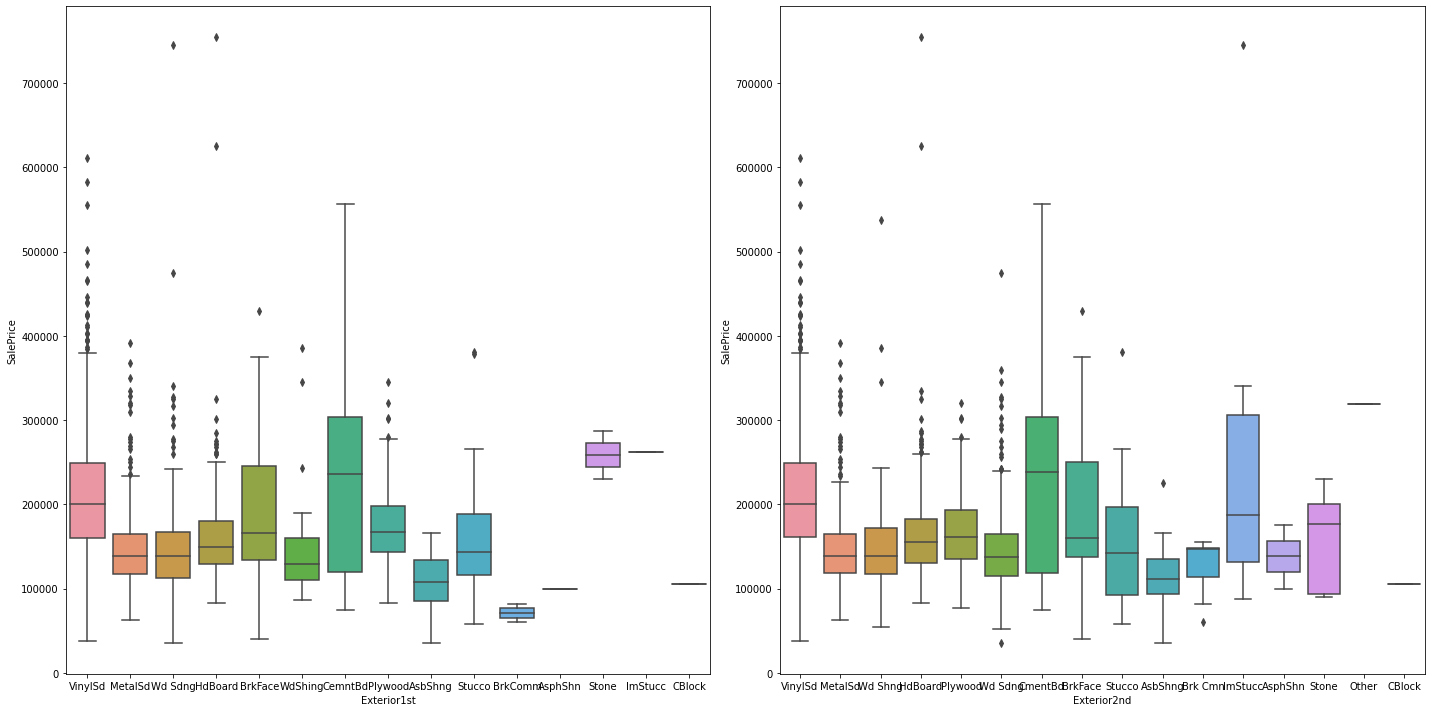

In [25]:
fig = plt.figure(figsize=(20,10));   
ax1 = fig.add_subplot(1,2,1);  
ax2 = fig.add_subplot(1,2,2);
sns.boxplot("Exterior1st", "SalePrice", data=df_train, ax=ax1)
sns.boxplot("Exterior2nd", "SalePrice", data=df_train,ax=ax2)
plt.tight_layout()

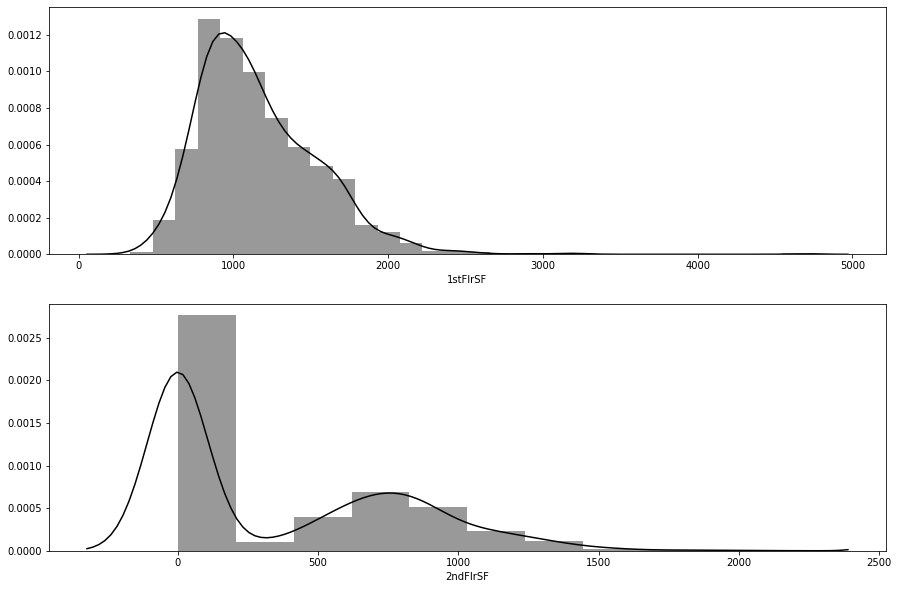

In [26]:
fig = plt.figure(figsize=(15,10));   
ax1 = fig.add_subplot(2,1,1);  
ax2 = fig.add_subplot(2,1,2);
sns.distplot(df_train['1stFlrSF'],bins=30,color='black',ax=ax1)
sns.distplot(df_train['2ndFlrSF'],bins=10,color='black',ax=ax2)

- 1st floor sqaure feet has a normal distribution
- Houses with 2nd floor has around 0 to 250 square feet of area with some houses of range of 500 to 1000 square feet

#### Converting catagorical features into dummy variable using pandas get dummies method

In [27]:
catogorical_features_ = np.delete(catogorical_features_,np.where(catogorical_features_=='Utilities'))

In [28]:
test_match=[]
for i,feature in enumerate(catogorical_features_): 
    test_match.append( (feature,(df_train[feature].nunique()  -  df_test[feature].nunique())))
    if (df_train[feature].nunique()  -  df_test[feature].nunique()) != 0:
        df_train.drop(feature,axis=1,inplace=True)
        df_test.drop(feature,axis=1,inplace=True)

In [29]:
print(test_match)

[('Street', 0), ('LotShape', 0), ('LandContour', 0), ('LotConfig', 0), ('LandSlope', 0), ('Neighborhood', 0), ('Condition1', 0), ('Condition2', 3), ('BldgType', 0), ('HouseStyle', 1), ('RoofStyle', 0), ('RoofMatl', 4), ('Exterior1st', 2), ('Exterior2nd', 1), ('MasVnrType', 0), ('ExterQual', 0), ('ExterCond', 0), ('Foundation', 0), ('BsmtQual', 0), ('BsmtCond', 0), ('BsmtExposure', 0), ('BsmtFinType1', 0), ('BsmtFinType2', 0), ('Heating', 2), ('HeatingQC', 0), ('CentralAir', 0), ('Electrical', 1), ('KitchenQual', 0), ('Functional', 0), ('GarageType', 0), ('GarageFinish', 0), ('GarageQual', 1), ('GarageCond', 0), ('PavedDrive', 0), ('SaleType', 0), ('SaleCondition', 0)]


In [30]:
catogorical_features_ = np.array([df_train.columns[df_train.dtypes == 'object'].to_list()])
dummies = []
concat_dummies=[]
for i,feature in enumerate(catogorical_features_[0]):
    dummies.append(pd.get_dummies(df_train[feature],drop_first=True))
    df_train = pd.concat([df_train,dummies[i]],axis=1) 

In [31]:
df_train.drop(['MSZoning', 'Street', 'LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
               'BldgType', 'RoofStyle','MasVnrType', 'ExterQual','Foundation',  'HeatingQC', 'CentralAir',
         'KitchenQual', 'Functional', 'GarageFinish','PavedDrive', 'SaleType', 'SaleCondition','ExterCond',
               'GarageCond',
               'GarageType','GarageYrBlt','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual'],
              axis=1,inplace=True)

In [32]:
catogorical_features_ = np.array([df_test.columns[df_test.dtypes == 'object'].to_list()])
dummies = []
concat_dummies=[]
for i,feature in enumerate(catogorical_features_[0]):
    dummies.append(pd.get_dummies(df_test[feature],drop_first=True))
    df_test = pd.concat([df_test,dummies[i]],axis=1) 

In [33]:
df_test.drop(['MSZoning', 'Street', 'LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
               'BldgType', 'RoofStyle','MasVnrType', 'ExterQual','Foundation',  'HeatingQC', 'CentralAir',
         'KitchenQual', 'Functional', 'GarageFinish','PavedDrive', 'SaleType', 'SaleCondition','ExterCond',
             'GarageCond','GarageType','GarageYrBlt','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual'],axis=1,inplace=True)

# Artificial Neural Network

In [34]:
X_train = np.array(df_train.drop('SalePrice',axis=1))
y_train = np.array(df_train['SalePrice'])
X_test = np.array(df_test)

In [35]:
print('Shape of X_train {} \nShape of y_test {}\nShape of X_test {}'.format(X_train.shape,y_train.shape,X_test.shape))

Shape of X_train (1460, 167) 
Shape of y_test (1460,)
Shape of X_test (1459, 167)


#### Feature Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [37]:
y_train = mms.fit_transform(y_train.reshape(-1,1))

In [38]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [39]:
regressor = Sequential()
regressor.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))

In [40]:
regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [41]:
regressor.fit(X_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
1460/1460 [==============================] - 0s 329us/step - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 2/100
1460/1460 [==============================] - 0s 89us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 3/100
1460/1460 [==============================] - 0s 87us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 4/100
1460/1460 [==============================] - 0s 87us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 5/100
1460/1460 [==============================] - 0s 88us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 6/100
1460/1460 [==============================] - 0s 88us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 7/100
1460/1460 [==============================] - 0s 87us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 8/100
1460/1460 [==============================] - 0s 86us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 9/100
1460/1460 [==============================] - 0s 85us/step - loss: 9.2810e-0

Text(0, 0.5, 'loss')

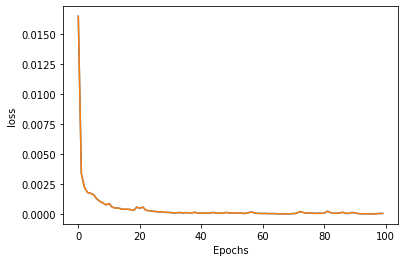

In [42]:
losses = regressor.history.history
losses = np.array(pd.DataFrame(losses))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('loss')

## Tuning the ANN

Commenting the code for timing constraint

In [43]:
'''
def build_classifier(optimizer,units1,units2,units3,units4):
    regressor = Sequential()
    regressor.add(Dense(units=units1,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=units2,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=units3,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=units4,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
    regressor.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])
    return regressor

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

regressor = KerasRegressor(build_fn=build_classifier)
parameters = {'batch_size':[10,15,25,32],
             'epochs':[100,300,500],
             'optimizer':['adam','rmsprop'],
             'units1':[512,256],
             'units2':[256,128],
             'units3':[256,128],
             'units4':[256,128,64]}

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 3)
grid_search = grid_search.fit(X_train, y_train)
'''


"\ndef build_classifier(optimizer,units1,units2,units3,units4):\n    regressor = Sequential()\n    regressor.add(Dense(units=units1,activation='relu',kernel_initializer='uniform'))\n    regressor.add(Dense(units=units2,activation='relu',kernel_initializer='uniform'))\n    regressor.add(Dense(units=units3,activation='relu',kernel_initializer='uniform'))\n    regressor.add(Dense(units=units4,activation='relu',kernel_initializer='uniform'))\n    regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))\n    regressor.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])\n    return regressor\n\nfrom keras.wrappers.scikit_learn import KerasRegressor\nfrom sklearn.model_selection import GridSearchCV\n\nregressor = KerasRegressor(build_fn=build_classifier)\nparameters = {'batch_size':[10,15,25,32],\n             'epochs':[100,300,500],\n             'optimizer':['adam','rmsprop'],\n             'units1':[512,256],\n             'units2':[256

In [44]:
'''print(grid_search.best_score_)
print('\n')
print(grid_search.best_params_)'''

"print(grid_search.best_score_)\nprint('\n')\nprint(grid_search.best_params_)"

In [45]:
Best = {'batch_size': 15, 'epochs': 500, 'optimizer': 'adam', 'units1': 512, 'units2': 128, 'units3': 128, 'units4': 64}

In [46]:
#from keras.models import load_model
#regressor.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
#regressor1 = load_model('my_model.h5')

## Training the ANN on best parameters

In [47]:
regressor = Sequential()
regressor.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

For furthur fine tuning add dropout layers and more layers to the model

In [48]:
regressor.fit(X_train,y_train,epochs=500,batch_size=15)

Epoch 1/500
1460/1460 [==============================] - 1s 359us/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 2/500
1460/1460 [==============================] - 0s 232us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 3/500
1460/1460 [==============================] - 0s 230us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 4/500
1460/1460 [==============================] - 0s 231us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 5/500
1460/1460 [==============================] - 0s 235us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 6/500
1460/1460 [==============================] - 0s 231us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 7/500
1460/1460 [==============================] - 0s 232us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 8/500
1460/1460 [==============================] - 0s 232us/step - loss: 9.0591e-04 - mean_squared_error: 9.0591e-04
Epoch 9/500
1460/1460 [==============================] - 0s 231us/step -

Text(0, 0.5, 'loss')

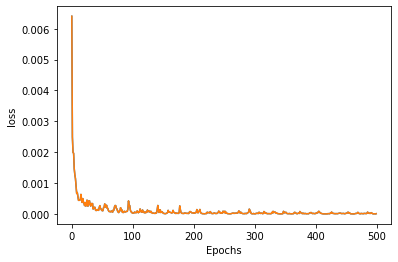

In [49]:
losses = regressor.history.history
losses = np.array(pd.DataFrame(losses))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('loss')

In [50]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               86016     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 316,161
Trainable params: 316,161
Non-trainable params: 0
_________________________________________________________________


## Prediction on test set

In [51]:
y_pred = regressor.predict(X_test) 
y_pred_original = mms.inverse_transform(y_pred.reshape(-1,1))
y_pred_original = y_pred_original.tolist()
y_pred_original = [pred for i in y_pred_original for pred in i]

In [52]:
test_set =pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submission = pd.DataFrame({'Id': test_set['Id'],'SalePrice': y_pred_original})

In [53]:
#submission.to_csv('submission.csv', index=False)

1. **Furthur Imrovement on our submission**

Training more regressors and combining it with previous one's

Take more missing values into consideration


In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators= 100)
regressor1.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
y_pred1 = regressor1.predict(X_test) 
y_pred_original1 = mms.inverse_transform(y_pred1.reshape(-1,1))
y_pred_original1 = y_pred_original1.tolist()
y_pred_original1 = [pred for i in y_pred_original1 for pred in i]

In [56]:
y_pred_final=[]
for i in range(0,1459):
    y_pred_final.append((y_pred_original[i]*0.5)+(y_pred_original1[i]*0.5))

In [57]:
submission = pd.DataFrame({'Id': test_set['Id'],'SalePrice': y_pred_final})

In [58]:
submission.to_csv('submission.csv', index=False)